Required Libriries

In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

C:\Users\laptop clinic\AppData\Local\Temp\ipykernel_4824\548859585.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Data Acquisition

In [3]:
filePath = 'food_orders_new_delhi (1).csv'
df = pd.read_csv(filePath)

Data Exploration

In [4]:
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [5]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


Data Cleaning

In [6]:
#to know if there any null values or no and where and the count of them
df.isna().value_counts()

Order ID  Customer ID  Restaurant ID  Order Date and Time  Delivery Date and Time  Order Value  Delivery Fee  Payment Method  Discounts and Offers  Commission Fee  Payment Processing Fee  Refunds/Chargebacks
False     False        False          False                False                   False        False         False           False                 False           False                   False                  815
                                                                                                                              True                  False           False                   False                  185
Name: count, dtype: int64

In [7]:
#to get the word or how it look in  Discounts and Offers
df['Discounts and Offers'].unique()

array(['5% on App', '10%', '15% New User', nan, '50 off Promo'],
      dtype=object)

In [8]:
#making a filter to get these nan values
filterNan = df['Discounts and Offers'].isna() == True
NaNValues = df.loc[filterNan]
NaNValues.head(3)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
12,13,C7949,R2086,2024-01-05 16:43:24,2024-01-05 18:08:24,674,0,Cash on Delivery,NaN,115,20,0
14,15,C6311,R2475,2024-02-03 00:49:50,2024-02-03 02:00:50,1193,0,Credit Card,NaN,192,16,0


In [71]:
NaNValues = NaNValues
df=df.fillna('0% No Discount')
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Total Time,Time by minutes,DayOrder
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,88,Thursday
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,35,Friday
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00,58,Wednesday
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,0% No Discount,146,27,0,0 days 00:46:00,46,Tuesday
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00,89,Monday


In [10]:
#checking if there any duplicated values 
duplicatedVal = df.duplicated()
duplicatedVal.value_counts()

False    1000
Name: count, dtype: int64

First Question : what is the average time of any order and the relation with the order value ?

In [11]:
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])
df['Total Time'] = df['Delivery Date and Time'] - df['Order Date and Time']
df['Total Time'] = pd.to_timedelta(arg=df['Total Time'])
df['Total Time']

0     0 days 01:28:00
1     0 days 00:35:00
2     0 days 00:58:00
3     0 days 00:46:00
4     0 days 01:29:00
            ...      
995   0 days 00:42:00
996   0 days 01:20:00
997   0 days 01:01:00
998   0 days 01:44:00
999   0 days 00:53:00
Name: Total Time, Length: 1000, dtype: timedelta64[ns]

In [12]:
#to get the total minutes
daysNum = df['Total Time'].dt.components['days']
hoursNum = df['Total Time'].dt.components['hours']
minutesNum = df['Total Time'].dt.components['minutes']

#making a column with it 
df['Time by minutes'] = daysNum * 24 * 60 + hoursNum * 60 + minutesNum 

#getting average Time ber order 
OrderNum = df['Order ID'].count()
totalMinutes = df['Time by minutes'].sum()
avgPerOrder = totalMinutes / OrderNum
avgPerOrder

73.575

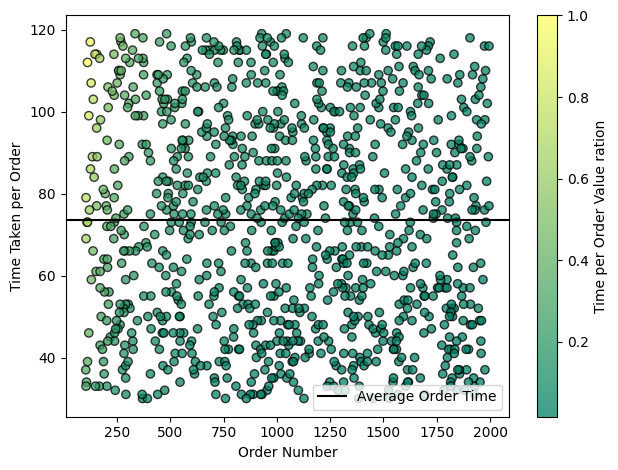

In [75]:
orderValue = df['Order Value']
Time_Taken = df['Time by minutes']
#plotting the main values 
plt.scatter(orderValue , Time_Taken , c=Time_Taken / orderValue , cmap='summer',
            edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('Time per Order Value ration')
#static line for the average time
plt.axhline(y=avgPerOrder, color='black', label='Average Order Time')

plt.legend()
plt.xlabel('Order Number')
plt.ylabel('Time Taken per Order')
plt.tight_layout()
plt.show()

####after I saw the plot I didn't expict it -making the value lower the lower time taken on delivery-and for this is a lot of resons I will try to find : 
1-to group the values by resturant and show if there any pattern for some resturants that deliver slow
2-The point I want to play with and it will me is the distance taken from the resturant to the delivery place but this data don't have it but I will try to make another thing without using it 

Restaurant ID
R2317    6
R2804    5
R2726    5
R2523    5
R2016    5
        ..
R2141    1
R2428    1
R2576    1
R2388    1
R2742    1
Name: count, Length: 621, dtype: int64
The most Resturant Orders the value or His total Orders is : 5141
Restaurant ID
R2317    6
R2804    5
R2726    5
R2523    5
R2016    5
        ..
R2141    1
R2428    1
R2576    1
R2388    1
R2742    1
Name: count, Length: 621, dtype: int64
3


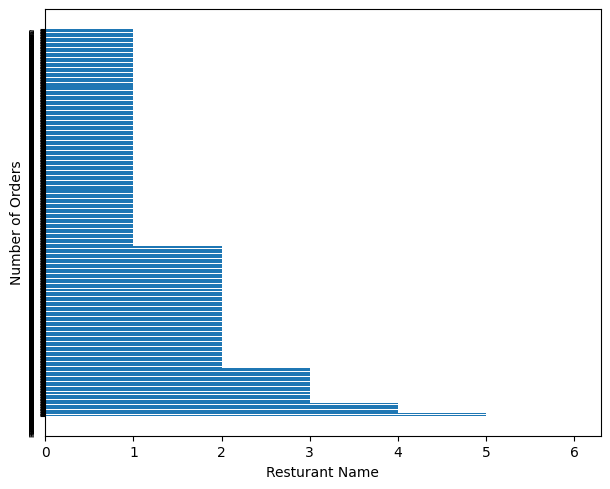

In [58]:
resturantGroup = df.groupby(['Restaurant ID'])
########The number of orders ber resturant 
NumorderPerResturant = df['Restaurant ID'].value_counts()
print(NumorderPerResturant)
#getting the total order value of the resturant who makes the most orders 
ordersValue = str(resturantGroup['Order Value'].sum().loc['R2317'])
print('The most Resturant Orders the value or His total Orders is : '+ordersValue)
#The maxiumum number of orders ber one coustomer 
mostCustomerOrderNumOrders = df['Customer ID'].value_counts().max()
print(cus)
resturantGroup['Order Value'].sum()

plt.barh(df['Restaurant ID'].unique() , NumorderPerResturant)
plt.tight_layout()
plt.xlabel('Resturant Name')
plt.ylabel('Number of Orders')
plt.yticks(ticks=range(len(df['Restaurant ID'].unique() )), labels=df['Restaurant ID'].unique() , fontsize=5 ,rotation=90)
plt.show()

In [30]:
maxOrdersValue = resturantGroup['Order Value'].sum().max()
maxOrdersValue

6794

Second Question : The relation between the day in the week and the number of orders?

In [55]:
df['DayOrder'] = df['Order Date and Time'].dt.day_name()
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Total Time,Time by minutes,DayOrder
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,0 days 01:28:00,88,Thursday
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,0 days 00:35:00,35,Friday
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,0 days 00:58:00,58,Wednesday
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0 days 00:46:00,46,Tuesday
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,0 days 01:29:00,89,Monday


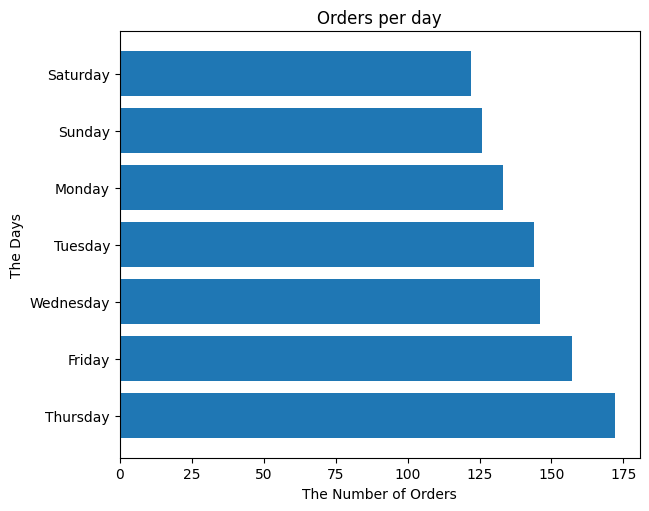

In [63]:
dayGroup = df['DayOrder'].value_counts()
dayName = df['DayOrder'].unique()
plt.barh(dayName , dayGroup)

plt.tight_layout()
plt.xlabel('The Number of Orders')
plt.ylabel('The Days')
plt.title('Orders per day')
plt.show()

In [99]:
df[['Discount Value' , 'Discount Type']] = df['Discounts and Offers'].str.split('%' , expand=True)
df.head()
df['Discount Value'].unique()
filt = df['Discount Value'] == ('50 off Promo')
neededValues = df.loc[filt]
df['Discount Value'].replace('50 off Promo' , '50' , inplace=True)
df.loc[filt,'Discount Type'] = 'off Promo'
df.head()
df['Discount Type'].unique()
filterNonTypes = df['Discount Type'] == ''
df.loc[filterNonTypes , 'Discount Type'] = 'Financial compensation'
df.head()
df.drop(columns=['Discounts and Offers'] , inplace=True)
df.head()

C:\Users\laptop clinic\AppData\Local\Temp\ipykernel_4824\3830441647.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Discount Value'].replace('50 off Promo' , '50' , inplace=True)


,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Total Time,Time by minutes,DayOrder,Discount Value,Discount Type
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,150,47,0,0 days 01:28:00,88,Thursday,5,on App
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,198,23,0,0 days 00:35:00,35,Friday,10,Financial compensation
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,195,45,0,0 days 00:58:00,58,Wednesday,15,New User
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,146,27,0,0 days 00:46:00,46,Tuesday,0,No Discount
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,130,50,0,0 days 01:29:00,89,Monday,50,off Promo
